#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 Feature 사용
- 구현프레임워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [393]:
# 모듈 로딩
import torch                    # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn           # 인공신경망 관련 모듈
import torch.nn.functional as F    # 손실, 거리 등 함 수관련 모듈
import torch.optim as optimizer # 최적화 기법 관련 모듈

import pandas as pd
from sklearn.model_selection import train_test_split


In [394]:
# 데이터 준비
FILE = r'C:\Users\zizonkjs\머신러닝,딥러닝\data\iris.csv'
irisdf = pd.read_csv(FILE, usecols=[0,1,2,3])
irisdf

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[2] 모델준비
학습방법 : 지도학습 > 회귀
알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [395]:
model = nn.Linear(3,1)

# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}] {param} \n')

[weight] Parameter containing:
tensor([[-0.5711,  0.3697, -0.5732]], requires_grad=True) 

[bias] Parameter containing:
tensor([0.0891], requires_grad=True) 



[3] 최적화 인스턴스 준비

In [396]:
### 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim = optimizer.Adam(model.parameters(), lr=0.1)

[4] 모델 학습 => 개발자가 구현


[4-1] 데이터셋 Tensor화 진행 : 데이터 준비 시 진행 하거나 또는 학습전에 진행

In [397]:
featureTS = torch.from_numpy(irisdf[irisdf.columns[:-1]].values).float()
print(featureTS.shape)

targetTS= torch.from_numpy(irisdf[['petal.width']].values).float()
print(targetTS.shape)

torch.Size([150, 3])
torch.Size([150, 1])


In [398]:
X_train, X_test, y_train, y_test = train_test_split(featureTS, 
                                                    targetTS,
                                                    test_size=0.2)

# Train & Valid
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train,
                                                    test_size=0.2)
print(f'Train {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}')
print(f'Train {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}')

Train torch.Size([96, 3]), TEST torch.Size([30, 3]), VAL torch.Size([24, 3])
Train torch.Size([96, 1]), TEST torch.Size([30, 1]), VAL torch.Size([24, 1])


[4-2] 학습진행 
    *학습횟수 결정 ==> 에폭 설정
    *학습결과 저장 ==> 손실저장 변수

In [399]:
## 테스트/검증 함수
# ==> 가중치, 절편 업데이트 X, 최적화 미진행
# ==> 현재 가중치와 절편값으로 테스트 진행
# 모델 학습 함수
def testing(test_TS, targetTS, kind='Val'):
    

    with torch.no_grad(): # 가중치 및 절편 업데이트 진행 금지
        # 1. 학습 진행 forward
        pre_y=model(test_TS)

        # 2. 오차 계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        

        # 4. 학습결과 출력 및 저장
        print(f'[{kind}] {kind} LOSS : {loss}')

    return loss


In [400]:
# 모델 검증 함수

EPOCH=100
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS):
    
    loss_history=[[],[]]

    for epoch in range(EPOCH):
        # 1. 학습 진행 forward
        pre_y=model(featureTS)

        # 2. 오차 계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())

        # 3. 최적화 - 가중치, 절편 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        # 4. 검증 : 모델이 제대로 만들어 지는 검사
        val_loss=testing(valTS,valTargetTS, kind='val')
        loss_history[1].append(val_loss.item())

        # 4. 학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH} ] LOSS : {loss}')

    return loss_history
loss = training(X_train, y_train, X_val, y_val)
loss

[val] val LOSS : 18.032854080200195
[0/100 ] LOSS : 34.32585906982422
[val] val LOSS : 9.144898414611816
[1/100 ] LOSS : 20.444589614868164
[val] val LOSS : 3.8693087100982666
[2/100 ] LOSS : 10.53730297088623
[val] val LOSS : 1.8444104194641113
[3/100 ] LOSS : 4.50604772567749
[val] val LOSS : 2.3347785472869873
[4/100 ] LOSS : 1.9779266119003296
[val] val LOSS : 4.2442402839660645
[5/100 ] LOSS : 2.1858322620391846
[val] val LOSS : 6.380329608917236
[6/100 ] LOSS : 3.978600263595581
[val] val LOSS : 7.85016393661499
[7/100 ] LOSS : 6.095523834228516
[val] val LOSS : 8.27090072631836
[8/100 ] LOSS : 7.583207607269287
[val] val LOSS : 7.698347568511963
[9/100 ] LOSS : 8.022061347961426
[val] val LOSS : 6.435909748077393
[10/100 ] LOSS : 7.45614767074585
[val] val LOSS : 4.867422103881836
[11/100 ] LOSS : 6.193885803222656
[val] val LOSS : 3.3495566844940186
[12/100 ] LOSS : 4.631380558013916
[val] val LOSS : 2.1504034996032715
[13/100 ] LOSS : 3.137702703475952
[val] val LOSS : 1.41781

[[34.32585906982422,
  20.444589614868164,
  10.53730297088623,
  4.50604772567749,
  1.9779266119003296,
  2.1858322620391846,
  3.978600263595581,
  6.095523834228516,
  7.583207607269287,
  8.022061347961426,
  7.45614767074585,
  6.193885803222656,
  4.631380558013916,
  3.137702703475952,
  1.9888957738876343,
  1.3338509798049927,
  1.185113787651062,
  1.435065746307373,
  1.8974027633666992,
  2.365673780441284,
  2.6713199615478516,
  2.722470998764038,
  2.5140302181243896,
  2.112112283706665,
  1.623404860496521,
  1.1607893705368042,
  0.813781201839447,
  0.6292200684547424,
  0.6050630211830139,
  0.6975393295288086,
  0.8388482928276062,
  0.959618866443634,
  1.0089869499206543,
  0.9664183259010315,
  0.842818558216095,
  0.6722685694694519,
  0.49833178520202637,
  0.3597153425216675,
  0.27944424748420715,
  0.260178804397583,
  0.2863074541091919,
  0.33140766620635986,
  0.3681223392486572,
  0.3769824504852295,
  0.35142603516578674,
  0.2978799045085907,
  0.231

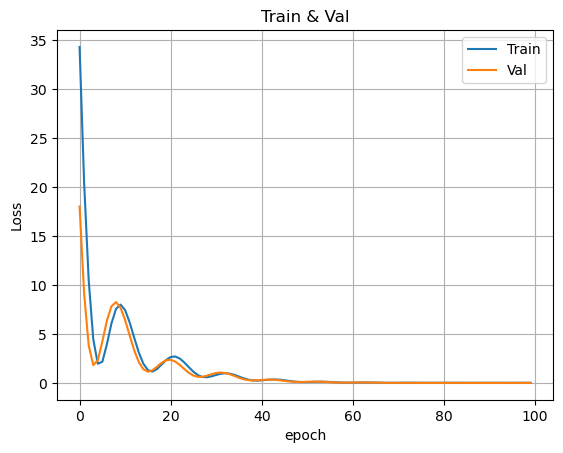

In [401]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt
plt.plot(loss[0], label='Train')
plt.plot(loss[1], label='Val')
plt.title('Train & Val')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [402]:
# 보스턴 집값 torch Linear 만들어오기